<a href="https://colab.research.google.com/github/ChesneeMurdock/LaGrange-Interpolation/blob/main/Lagrange_Interpolation%3CMurdock%3E.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Lagrange Interpolation**

## **Packages used:**

* import numpy as np
* import matplotlib.pyplot as plt


## **Code cell 1**

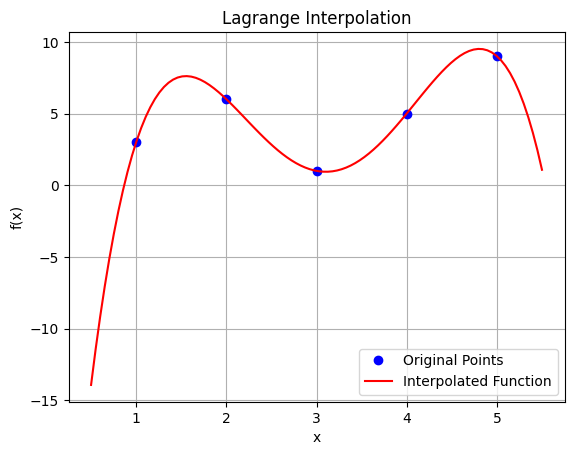

In [1]:
# __code cell 1___
# Write a code for a function that does Lagrange Interpolation

'''Function for Lagrange interpolation
name: lagrangeInterp
inputs:
xiVec:  Vector of points where function is known
fiVec:  Vector of function values at xiVec
xVec:   Vector of x values where function is to be interpolated to

outputs:
fInterpVec:   Vector of interpolated function values at the points x
'''

# Make sure that numpy is imported
import numpy as np  #@
# function definition statement
def lagrangeInterp(xiVec, fiVec, xVec): # @
    ni = len(xiVec)  #@ number of points
    xiVec = np.array(xiVec).reshape((-1, 1))  #@
    xiDiffMx = xiVec - xiVec.T  #@
    denomMx = xiDiffMx + np.eye(ni)  #@
    denomVec = np.prod(denomMx, axis=1)  #@
    xVec = np.array(xVec).reshape((1, -1))  #@
    numMx = xVec - xiVec  #@
    fInterpVec = np.zeros_like(xVec)  #@
    for j in range(ni):  #@
        numTmp = np.copy(numMx)  #@
        numTmp[j, :] = 1  #@
        numVec = np.prod(numTmp, axis=0)  #@
        termVec = numVec / denomVec[j] * fiVec[j]  #@
        fInterpVec += termVec  #@
    fInterpVec = np.squeeze(fInterpVec)  #@
    return fInterpVec  #@

### Test program
import matplotlib.pyplot as plt

### Include an example for testing
xPtsVec = [1, 2, 3, 4, 5]  #@

# Create a vector of function values fValsVec for the points
fValsVec = [3, 6, 1, 5, 9]  #@

# Create a vector xInterp of x values.
xInterp = np.linspace(0.5, 5.5, 100)  #@

# Call the function to get interpolated function values
fInterpVec = lagrangeInterp(xPtsVec, fValsVec, xInterp)  #@

# Plotting section
plt.plot(xPtsVec, fValsVec, 'bo', label='Original Points')  #@
plt.plot(xInterp, fInterpVec, 'r-', label='Interpolated Function')
plt.xlabel('x')
plt.ylabel('f(x)')
plt.title('Lagrange Interpolation')
plt.legend(loc="best")
plt.grid(True)
plt.show()  #@

Use your function to interpolate the functions $y=\sin(k\pi x/3 + 0.5) + 3k$ for $k=1,2,3,4$ on the interval $[-10,10]$. As your original $x$ values, use the 41 integers from -20 to 20. Your interpolated $x$ values should be spaced 0.1 apart. On the same graph, graph (a) the original functions evaluated at the original $x$ values as points, (b) the original functions at the interpolated $x$ values as dotted lines, and (c) the interpolated functions with solid lines. In your plot, let the $x$ limits range from -10 to 10.



---



## **Code cell 2**

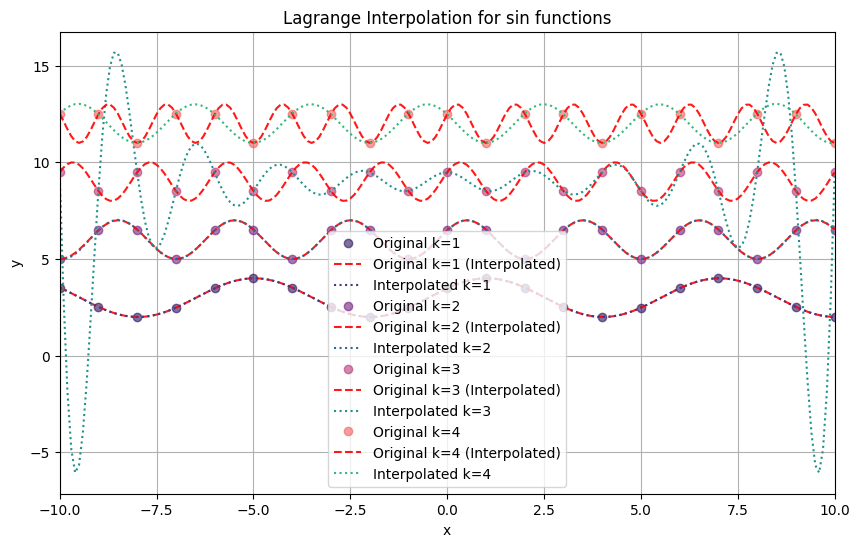

In [2]:
# __code cell 2___
# On the same graph, graph (a) the original functions evaluated at the original
# x  values as points, (b) the original functions at the interpolated  x  values
# as dotted lines, and (c) the interpolated functions with solid lines.
# In your plot, let the  x  limits range from -10 to 10.

'''Function for Lagrange interpolation
y=sin(kπx/3+0.5)+3k function for k=1,2,3,4 on the interval [−10,10]
'''

# Function definition statement
# y=sin(kπx/3+0.5)+3k  for  k=1,2,3,4  on the interval  [−10,10]

def lagrangeInterp(xiVec, fiVec, xVec):
    ni = len(xiVec)
    xiVec = np.array(xiVec).reshape((-1, 1))
    xiDiffMx = xiVec - xiVec.T
    denomMx = xiDiffMx + np.eye(ni)
    denomVec = np.prod(denomMx, axis=1)
    xVec = np.array(xVec).reshape((1, -1))
    numMx = xVec - xiVec
    fInterpVec = np.zeros_like(xVec)
    for j in range(ni):
        numTmp = np.copy(numMx)
        numTmp[j, :] = 1
        numVec = np.prod(numTmp, axis=0)
        termVec = numVec / denomVec[j] * fiVec[j]
        fInterpVec += termVec
    fInterpVec = np.squeeze(fInterpVec)
    return fInterpVec

# Original x values
original_x = np.linspace(-20, 20, 41)

# Interpolated x values
interpolated_x = np.linspace(-10, 10, 201)  # generates 201 even spaced x values between -10 and 10

# Functions to interpolate
def original_functions(x, k):
    return np.sin(k * np.pi * x / 3 + 0.5) + 3 * k

# Original function values at original x values
original_y_at_original_x = [original_functions(original_x, k) for k in range(1, 6)]

# Original function values at interpolated x values
original_y_at_interpolated_x = [original_functions(interpolated_x, k) for k in range(1, 6)]

# Interpolated function values
interpolated_y = [lagrangeInterp(original_x, original_functions(original_x, k), interpolated_x) for k in range(1, 6)]

# Plotting
plt.figure(figsize=(10, 6))

for k in range(1, 5):
    original_color = plt.cm.magma(k / 6)  # Generate a color from the Viridis colormap
    interpolated_color = plt.cm.viridis(k / 6)  # Generate a color from the Magma colormap

    plt.plot(original_x, original_y_at_original_x[k-1], 'o', color=original_color, label=f'Original k={k}', alpha=0.6)  # (a)
    plt.plot(interpolated_x, original_y_at_interpolated_x[k-1], '--', color='red', label=f'Original k={k} (Interpolated)', alpha=0.9)  # (b)
    plt.plot(interpolated_x, interpolated_y[k-1], ':', color=interpolated_color, label=f'Interpolated k={k}')  # (c)

plt.xlabel('x')
plt.ylabel('y')
plt.title('Lagrange Interpolation for sin functions')
plt.xlim(-10, 10)
plt.legend(loc="best")
plt.grid(True)
plt.show()



---



## **Question 1**![Lagrange02.jpg]()
a. With reference to the above graph: which functions are fit well by the interpolating function, and which don't? Can you explain why? (Look up the word 'aliasing'.)<br>

**For small values of k, specifically for k=1 and k=2, we are creating samples (in a period there are 6 samples) to mimic the features of the sin function, and the interpolation approximates the original sin function well. When k is low, the high-frequency components are captures accurately, and this avoids aliasing and achieving a good fit.**

**As k increases, specifically for k=3 and k=4, the samples (which are fewer) we compile do not sufficiently capture the high frequency of the sin wave. The interpolation does not accurately represent the original function and can cause errors and deviations from the true sin wave. When k is high, the high-frequency components are not captured accurately, and this can lead to aliasing and interpolation errors.**

b. Given a value of $k$, how would you predict whether or not the interpolating function fits well?

**When k is small, the interpolation approximates the original function accurately because there are more samples in a given period. When k is large, the interpolation does not approximate the original function due to fewer samples in a given period, and this leads to errors and deviations from the original function.**



---



## **Question 2**





a. Prove the above limit equation. You may assume that the limit of a sum is the sum of the limits (when they exist), and that  limx→∞xm=0  if  m<0 . (This is a Calc 1 exercise. If you don't remember how to prove it, find a Calc 1 book. )

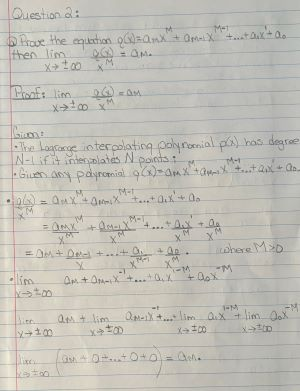

b. Show how the two bullet points above prove that the Lagrange interpolating polynomial  p(x)  always goes to  ±∞  when  x→±∞ .

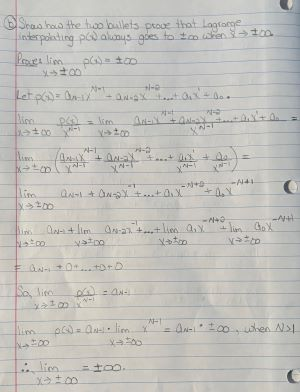

c. We may ask the question of whether $p(x)$ goes to $+\infty$ or $-\infty$ when $x \rightarrow \infty$.  Suppose $p(x)$ interpolates the function $f(x)$ at the points $x_1,\ldots x_N$, so that $p(x_n) = f(x_n), n=1,\ldots N$. Show how the sign of $p(x)$ as $x \rightarrow \infty$ can be determined from the values of $x_1,\ldots x_N$ and the values of $f(x_1),\ldots f(x_N)$.  Similarly determine the sign of $p(x)$ as $x \rightarrow -\infty$.

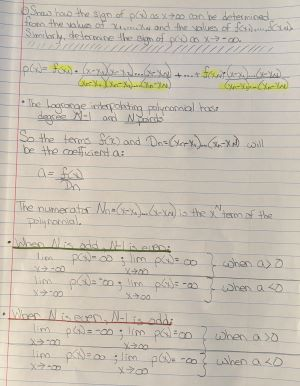

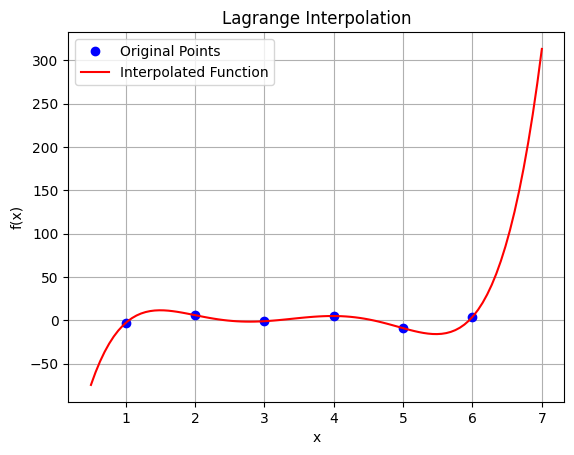

Number of points (N): 6
Degree of the polynomial (N - 1): 5
Sum of coefficients (aM): 1.1833333333333333


In [4]:
# __code cell 2d__
# Verify that your results in 2c. are correct for the test function that you
# constructed in the first code cell.

# Function definition statement
def lagrangeInterp(xiVec, fiVec, xVec):
    ni = len(xiVec)
    xiVec = np.array(xiVec).reshape((-1, 1))
    xiDiffMx = xiVec - xiVec.T
    denomMx = xiDiffMx + np.eye(ni)
    denomVec = np.prod(denomMx, axis=1)
    xVec = np.array(xVec).reshape((1, -1))
    numMx = xVec - xiVec
    fInterpVec = np.zeros_like(xVec)
    sum_a = 0  # Initialize sum of coefficients
    for j in range(ni):
        numTmp = np.copy(numMx)
        numTmp[j, :] = 1
        numVec = np.prod(numTmp, axis=0)
        termVec = numVec / denomVec[j] * fiVec[j]

        # Coefficient of the x^n term
        a = fiVec[j] / denomVec[j]
        sum_a += a  # Add current coefficient to the sum

        fInterpVec += termVec
    fInterpVec = np.squeeze(fInterpVec)
    return fInterpVec, sum_a

# Example for testing
xPtsVec = [1, 2, 3, 4, 5, 6]
fValsVec = [-3, 6, -1, 5, -9, 4]
xInterp = np.linspace(0.5, 7, 100)

fInterpVec, sum_a = lagrangeInterp(xPtsVec, fValsVec, xInterp)

# Plotting section
plt.plot(xPtsVec, fValsVec, 'bo', label='Original Points')
plt.plot(xInterp, fInterpVec, 'r-', label='Interpolated Function')
plt.xlabel('x')
plt.ylabel('f(x)')
plt.title('Lagrange Interpolation')
plt.legend(loc="best")
plt.grid(True)
plt.show()

# Printing the number of points, the degree of the polynomial, and the sum of coefficients
print("Number of points (N):", len(xPtsVec))
print("Degree of the polynomial (N - 1):", len(xPtsVec) - 1)
print("Sum of coefficients (aM):", sum_a)

---
---
---



# **For Chesnee**

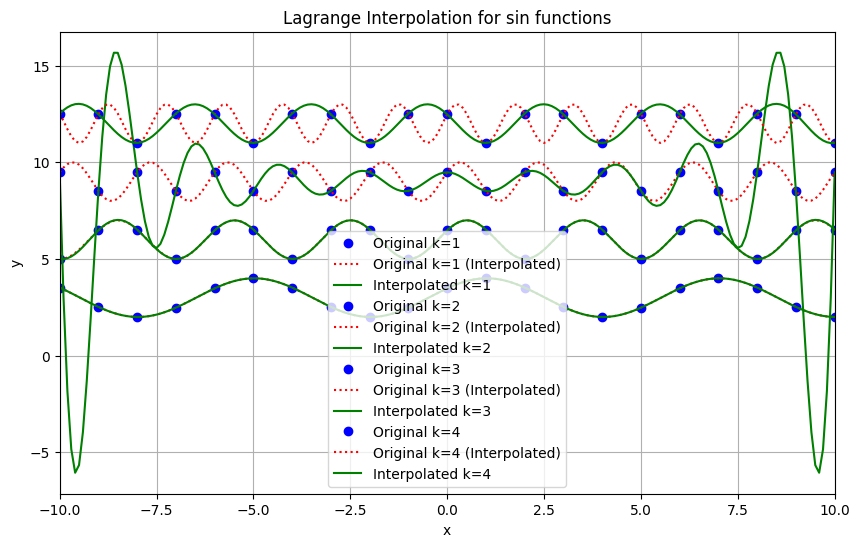

In [7]:
'''Function for Lagrange interpolation
y=sin(kπx/3+0.5)+3k function for k=1,2,3,4 on the interval [−10,10]
'''
# function definition statement
# y=sin(kπx/3+0.5)+3k  for  k=1,2,3,4  on the interval  [−10,10]

def lagrangeInterp(xiVec, fiVec, xVec):
    ni = len(xiVec)
    xiVec = np.array(xiVec).reshape((-1, 1))
    xiDiffMx = xiVec - xiVec.T
    denomMx = xiDiffMx + np.eye(ni)
    denomVec = np.prod(denomMx, axis=1)
    xVec = np.array(xVec).reshape((1, -1))
    numMx = xVec - xiVec
    fInterpVec = np.zeros_like(xVec)
    for j in range(ni):
        numTmp = np.copy(numMx)
        numTmp[j, :] = 1
        numVec = np.prod(numTmp, axis=0)
        termVec = numVec / denomVec[j] * fiVec[j]
        fInterpVec += termVec
    fInterpVec = np.squeeze(fInterpVec)
    return fInterpVec

# Original x values
original_x = np.linspace(-20, 20, 41)

# Interpolated x values
interpolated_x = np.linspace(-10, 10, 201)  # generates 201 even spaced x values between -10 and 10

# Functions to interpolate
def original_functions(x, k):
    return np.sin(k * np.pi * x / 3 + 0.5) + 3 * k

# Original function values at original x values
original_y_at_original_x = [original_functions(original_x, k) for k in range(1, 5)]

# Original function values at interpolated x values
original_y_at_interpolated_x = [original_functions(interpolated_x, k) for k in range(1, 5)]

# Interpolated function values
interpolated_y = [lagrangeInterp(original_x, original_functions(original_x, k), interpolated_x) for k in range(1, 5)]

# Plotting
plt.figure(figsize=(10, 6))
for i, k in enumerate(range(1, 5)):
    # (a)
    plt.plot(original_x, original_y_at_original_x[i], 'bo', label=f'Original k={k}')
    # (b)
    plt.plot(interpolated_x, original_y_at_interpolated_x[i], 'r:', label=f'Original k={k} (Interpolated)')
    # (c)
    plt.plot(interpolated_x, interpolated_y[i], 'g-', label=f'Interpolated k={k}')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Lagrange Interpolation for sin functions')
plt.xlim(-10, 10)
plt.legend(loc="best")
plt.grid(True)
# k=1 and k=2, the interpolation fits wellplt.show()

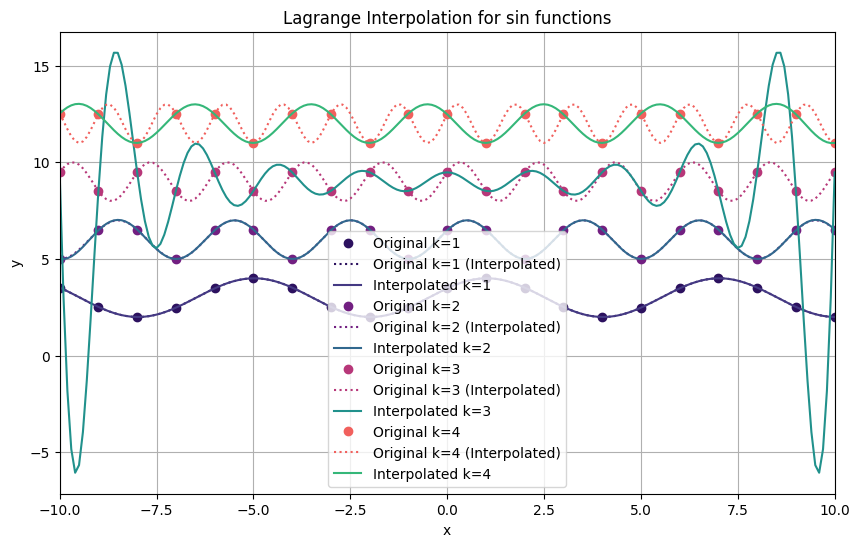

In [5]:
'''Function for Lagrange interpolation
y=sin(kπx/3+0.5)+3k function for k=1,2,3,4 on the interval [−10,10]
'''
# function definition statement
# y=sin(kπx/3+0.5)+3k  for  k=1,2,3,4  on the interval  [−10,10]

def lagrangeInterp(xiVec, fiVec, xVec):
    ni = len(xiVec)
    xiVec = np.array(xiVec).reshape((-1, 1))
    xiDiffMx = xiVec - xiVec.T
    denomMx = xiDiffMx + np.eye(ni)
    denomVec = np.prod(denomMx, axis=1)
    xVec = np.array(xVec).reshape((1, -1))
    numMx = xVec - xiVec
    fInterpVec = np.zeros_like(xVec)
    for j in range(ni):
        numTmp = np.copy(numMx)
        numTmp[j, :] = 1
        numVec = np.prod(numTmp, axis=0)
        termVec = numVec / denomVec[j] * fiVec[j]
        fInterpVec += termVec
    fInterpVec = np.squeeze(fInterpVec)
    return fInterpVec

# Original x values
original_x = np.linspace(-20, 20, 41)

# Interpolated x values
interpolated_x = np.linspace(-10, 10, 201)  # generates 201 even spaced x values between -10 and 10

# Functions to interpolate
def original_functions(x, k):
    return np.sin(k * np.pi * x / 3 + 0.5) + 3 * k

# Original function values at original x values
original_y_at_original_x = [original_functions(original_x, k) for k in range(1, 6)]

# Original function values at interpolated x values
original_y_at_interpolated_x = [original_functions(interpolated_x, k) for k in range(1, 6)]

# Interpolated function values
interpolated_y = [lagrangeInterp(original_x, original_functions(original_x, k), interpolated_x) for k in range(1, 6)]

# Plotting
plt.figure(figsize=(10, 6))

for k in range(1, 5):
    original_color = plt.cm.magma(k / 6)  # Generate a color from the Viridis colormap
    interpolated_color = plt.cm.viridis(k / 6)  # Generate a color from the Magma colormap

    plt.plot(original_x, original_y_at_original_x[k-1], 'o', color=original_color, label=f'Original k={k}')  # (a)
    plt.plot(interpolated_x, original_y_at_interpolated_x[k-1], ':', color=original_color, label=f'Original k={k} (Interpolated)')  # (b)
    plt.plot(interpolated_x, interpolated_y[k-1], '-', color=interpolated_color, label=f'Interpolated k={k}')  # (c)

plt.xlabel('x')
plt.ylabel('y')
plt.title('Lagrange Interpolation for sin functions')
plt.xlim(-10, 10)
plt.legend(loc="best")
plt.grid(True)
plt.show()